In [239]:
import pandas as pd
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering


In [240]:
df = pd.read_csv(r"C:\Users\a\OneDrive\Desktop\ML\data\costumer.csv")
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [241]:

df.drop('CustomerID', axis=1, inplace=True)


In [242]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

In [243]:
df['Gender']

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64

In [244]:
df.dtypes

Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [245]:
features = ['Gender', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]


In [246]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Annual Income (k$) vs Spending Score (1-100)

K-MEAN

In [247]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)
df['KMeans_Cluster'] = labels


In [248]:
cluster_centers = df.groupby("KMeans_Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()

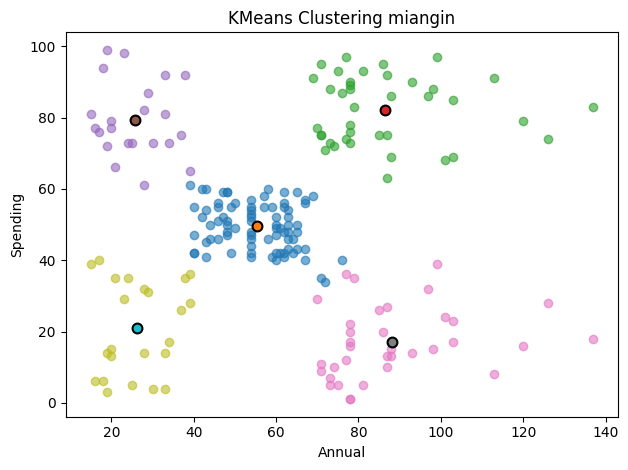

In [249]:
for cluster in sorted(df["KMeans_Cluster"].unique()):
    data = df[df["KMeans_Cluster"] == cluster]
    plt.scatter(
        data["Annual Income (k$)"],
        data["Spending Score (1-100)"],
        label=f"Cluster {cluster}",
        alpha=0.6
    )
    center = cluster_centers.loc[cluster]
    plt.scatter(
        center["Annual Income (k$)"],
        center["Spending Score (1-100)"],
        marker=".",  #center
        s=200,
        edgecolor='black',
        linewidth=1.5
    )
plt.title("KMeans Clustering miangin")
plt.xlabel("Annual")
plt.ylabel("Spending")
plt.tight_layout()
plt.show()

DBSCAN

In [250]:
dbscan = DBSCAN(eps=0.3, min_samples=7)
dbscan_labels = dbscan.fit_predict(X_scaled)

df['DBSCAN_Cluster'] = dbscan_labels


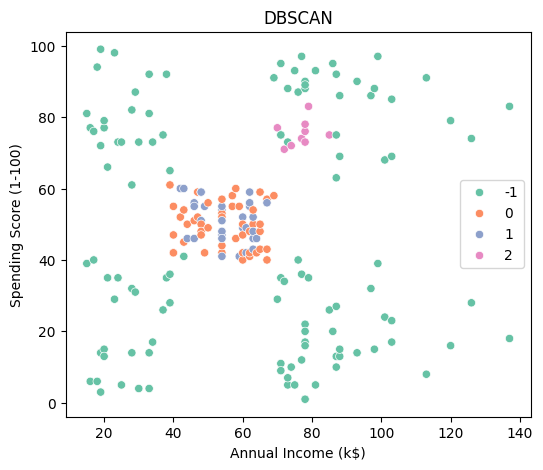

In [251]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=dbscan_labels, data = df, palette='Set2')
plt.title("DBSCAN")
plt.show()


Hierarchical 

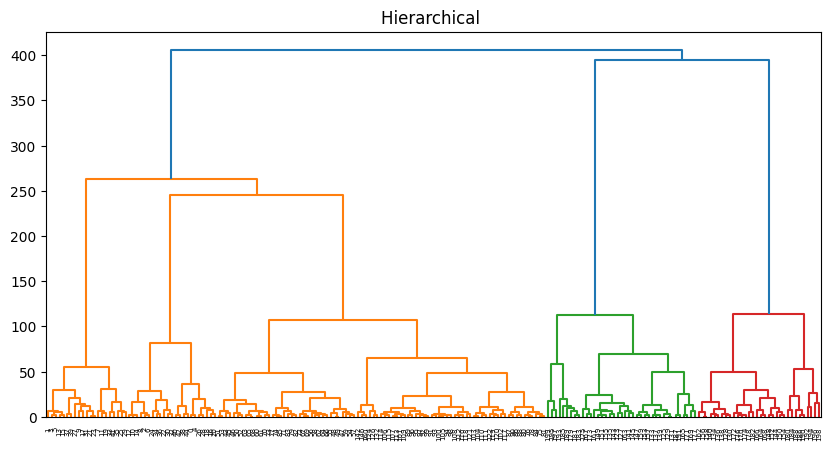

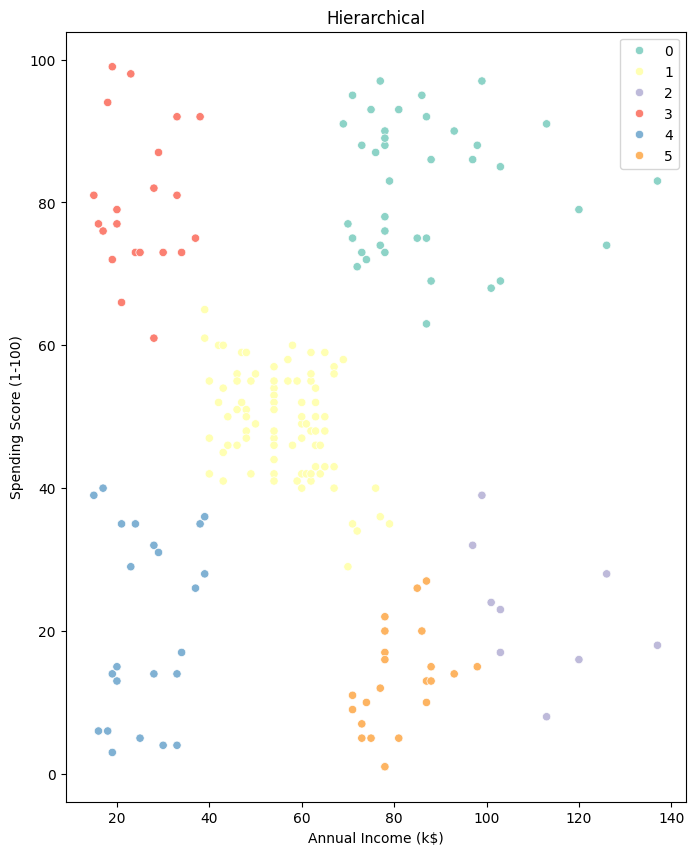

In [252]:
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Hierarchical ")
plt.show()


hierarchical = AgglomerativeClustering(n_clusters=6)
hier_labels = hierarchical.fit_predict(X)

df['Hierarchical_Cluster'] = hier_labels


plt.figure(figsize=(8,10))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=hier_labels, palette='Set3')
plt.title("Hierarchical")
plt.show()


Spending Score (1-100) vs G gender (not good)

k-mean

In [253]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)
df['KMeans_Cluster'] = labels


<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

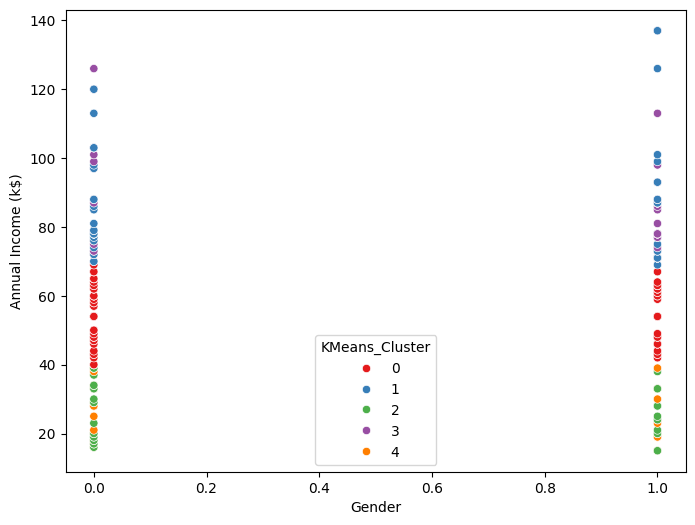

In [254]:
plt.figure(figsize=(8, 6))
sns.scatterplot( x='Gender', y='Annual Income (k$)', hue='KMeans_Cluster', data= df, palette='Set1')


dbscan

In [255]:
dbscan = DBSCAN(eps=0.3, min_samples=7)
dbscan_labels = dbscan.fit_predict(X_scaled)

df['DBSCAN_Cluster'] = dbscan_labels


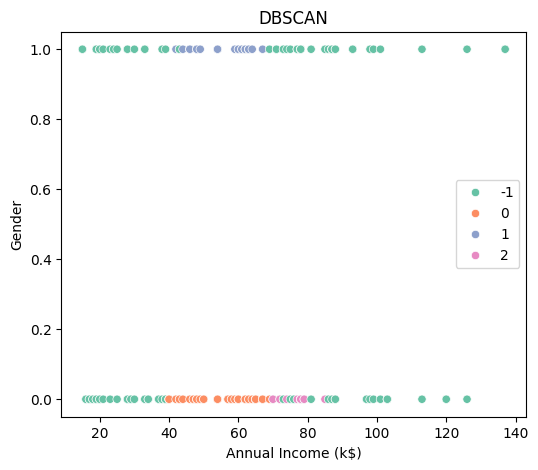

In [256]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Gender'], hue=dbscan_labels, data = df, palette='Set2')
plt.title("DBSCAN")
plt.show()


Hierarchical 

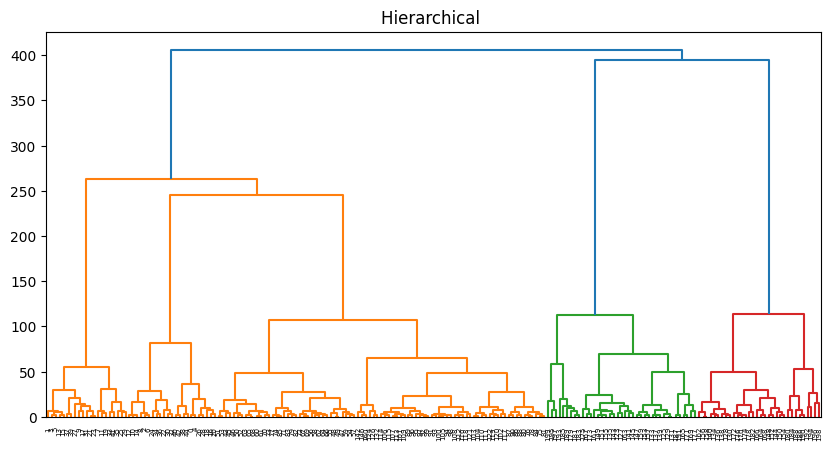

In [257]:
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Hierarchical ")
plt.show()





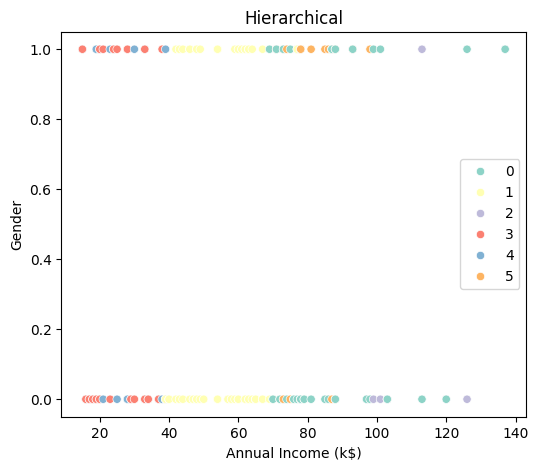

In [258]:
hierarchical = AgglomerativeClustering(n_clusters=6)
hier_labels = hierarchical.fit_predict(X)

df['Hierarchical_Cluster'] = hier_labels


plt.figure(figsize=(6,5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Gender'], hue=hier_labels, palette='Set3')
plt.title("Hierarchical")
plt.show()